In [75]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn import cross_validation as cv
%matplotlib inline

In [2]:
ratings = pd.read_csv('../../../data/movies/ratings.csv')
movies = pd.read_csv('../../../data/movies/movies.csv')

In [13]:
movies.head(), movies.shape

(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  \
 0  Adventure|Animation|Children|Comedy|Fantasy   
 1                   Adventure|Children|Fantasy   
 2                               Comedy|Romance   
 3                         Comedy|Drama|Romance   
 4                                       Comedy   
 
                                 title_format  
 0  <_sre.SRE_Match object at 0x7f8808ee4308>  
 1  <_sre.SRE_Match object at 0x7f8808ee4238>  
 2  <_sre.SRE_Match object at 0x7f8808ee41d0>  
 3  <_sre.SRE_Match object at 0x7f8808ee4168>  
 4  <_sre.SRE_Match object at 0x7f8808ee4100>  , (27256, 4))

In [9]:
movies['title_format'] = movies['title'].apply(lambda x: re.search('\(\d+\)',x))

In [11]:
movies[movies['title_format'].isnull()] ##some do not have the year data in them

,movieId,title,genres,title_format
10593,40697,Babylon 5,Sci-Fi,None
15646,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,None
17341,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,None
22368,107434,Diplomatic Immunity (2009– ),Comedy,None
22669,108548,"Big Bang Theory, The (2007-)",Comedy,None
22679,108583,Fawlty Towers (1975-1979),Comedy,None
23617,112406,Brazil: In the Shadow of the Stadiums,Documentary,None
23824,113190,Slaying the Badger,Documentary,None
24286,115133,Tatort: Im Schmerz geboren,Crime,None
24412,115685,National Theatre Live: Frankenstein,Drama|Fantasy,None


In [12]:
movies = movies[movies['title_format'].isnull()==False] ##remove movies with no year data

In [14]:
movies.shape

(27256, 4)

In [15]:
movies['title_name'] = movies['title'].apply(lambda x: x[:re.search('\(\d+\)',x).start()])
movies['year'] = movies['title'].apply(lambda x: re.search('\(\d+\)',x).group(0))
movies['released_year'] = movies['year'].apply(lambda x: re.search('\d+',x).group()) 

In [16]:
movies_by_year = movies['released_year'].value_counts().reset_index()
movies_by_year.columns = ['released_year','number_of_movies']
movies_by_year = movies_by_year.sort_values(by='released_year')

In [17]:
movies_by_year.head()

,released_year,number_of_movies
112,06,1
111,1891,1
120,1893,1
107,1894,2
108,1895,2


In [18]:
movies.shape, movies_by_year.shape

((27256, 7), (121, 2))

In [19]:
movies = movies[movies.released_year.isin(['06','69','500'])==False]
movies_by_year = movies_by_year[movies_by_year.isin(['06','69','500'])==False] ##remove invalid data

In [20]:
movies.shape, movies_by_year.shape

((27253, 7), (121, 2))

(array([ 1880.,  1900.,  1920.,  1940.,  1960.,  1980.,  2000.,  2020.]),
 <a list of 8 Text xticklabel objects>)

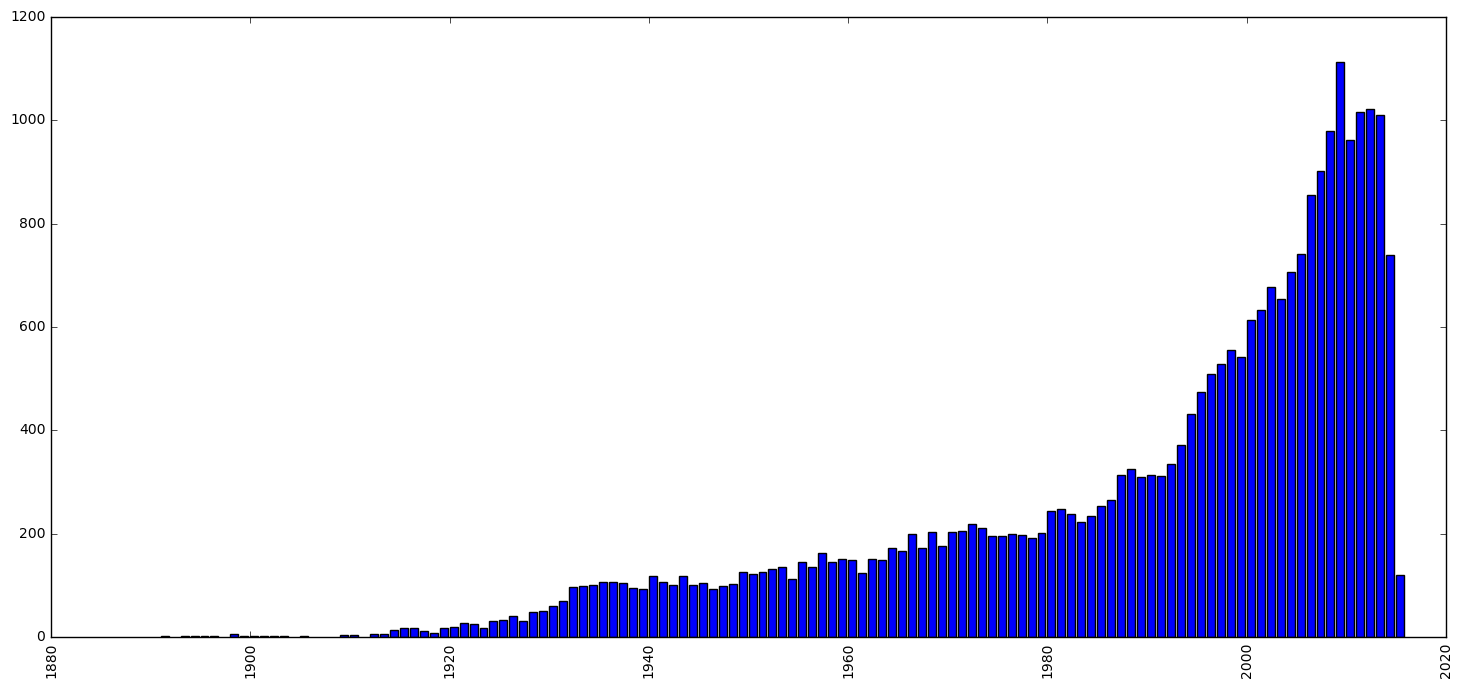

In [29]:
plot = plt.bar(movies_by_year.released_year, movies_by_year.number_of_movies)
plt.xticks(rotation=90)  ##movies by year

In [30]:
movies_genre = movies.genres.str.get_dummies('|')

In [31]:
movies_genre.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df_movies = pd.merge(movies, movies_genre, how='inner', left_index=True, right_index=True)
df_movies.head() ##237 movies with no genre listed

,movieId,title,genres,title_format,title_name,year,released_year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x7f8808ee4308>,Toy Story,(1995),1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x7f8808ee4238>,Jumanji,(1995),1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x7f8808ee41d0>,Grumpier Old Men,(1995),1995,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x7f8808ee4168>,Waiting to Exhale,(1995),1995,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x7f8808ee4100>,Father of the Bride Part II,(1995),1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_movies[df_movies['(no genres listed)']==1]

,movieId,title,genres,title_format,title_name,year,released_year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
16574,83773,Away with Words (San tiao ren) (1999),(no genres listed),<_sre.SRE_Match object at 0x7f88090223d8>,Away with Words (San tiao ren),(1999),1999,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16589,83829,Scorpio Rising (1964),(no genres listed),<_sre.SRE_Match object at 0x7f88090229f0>,Scorpio Rising,(1964),1964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16764,84768,Glitterbug (1994),(no genres listed),<_sre.SRE_Match object at 0x7f88090273d8>,Glitterbug,(1994),1994,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17080,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed),<_sre.SRE_Match object at 0x7f880902f8b8>,"Age of the Earth, The (A Idade da Terra)",(1980),1980,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17243,87061,Trails (Veredas) (1978),(no genres listed),<_sre.SRE_Match object at 0x7f8809033d30>,Trails (Veredas),(1978),1978,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18246,91246,Milky Way (Tejút) (2007),(no genres listed),<_sre.SRE_Match object at 0x7f8808fce370>,Milky Way (Tejút),(2007),2007,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18566,92435,"Dancing Hawk, The (Tanczacy jastrzab) (1978)",(no genres listed),<_sre.SRE_Match object at 0x7f8808fd69f0>,"Dancing Hawk, The (Tanczacy jastrzab)",(1978),1978,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18606,92641,Warsaw Bridge (Pont de Varsòvia) (1990),(no genres listed),<_sre.SRE_Match object at 0x7f8808fd7ac0>,Warsaw Bridge (Pont de Varsòvia),(1990),1990,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18984,94431,"Ella Lola, a la Trilby (1898)",(no genres listed),<_sre.SRE_Match object at 0x7f8808fe19f0>,"Ella Lola, a la Trilby",(1898),1898,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19015,94657,"Turkish Dance, Ella Lola (1898)",(no genres listed),<_sre.SRE_Match object at 0x7f8808fe2718>,"Turkish Dance, Ella Lola",(1898),1898,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
genre_list = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
              'Musical','Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
year_genre_movies = df_movies.groupby(['released_year'])[genre_list].sum()

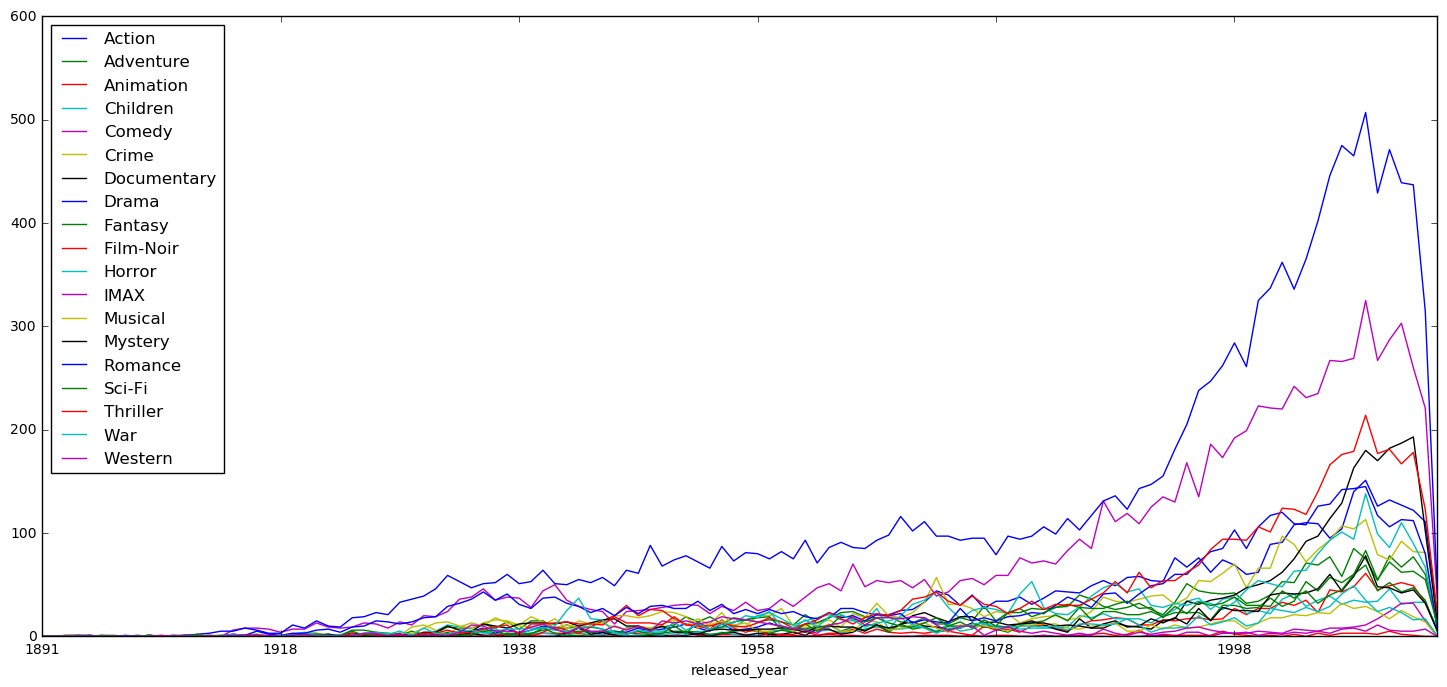

In [38]:
genreplot = year_genre_movies.plot() ##movies by genres and years they were released

In [39]:
for genre in genre_list:
    print genre + ': ' + str(year_genre_movies[genre].sum())

Action: 3519
Adventure: 2329
Animation: 1027
Children: 1139
Comedy: 8368
Crime: 2938
Documentary: 2467
Drama: 13337
Fantasy: 1411
Film-Noir: 330
Horror: 2611
IMAX: 196
Musical: 1035
Mystery: 1513
Romance: 4125
Sci-Fi: 1741
Thriller: 4177
War: 1194
Western: 676


In [41]:
ratings.shape

(20000263, 4)

In [42]:
average_rating = ratings.groupby('movieId')['rating'].mean()

In [44]:
average_rating = average_rating.reset_index()

In [45]:
average_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [46]:
df_movies_rating = pd.merge(df_movies, average_rating, how='left', on='movieId')

In [47]:
df_movies_rating.head()

,movieId,title,genres,title_format,title_name,year,released_year,(no genres listed),Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x7f8808ee4308>,Toy Story,(1995),1995,0,0,1,...,0,0,0,0,0,0,0,0,0,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x7f8808ee4238>,Jumanji,(1995),1995,0,0,1,...,0,0,0,0,0,0,0,0,0,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x7f8808ee41d0>,Grumpier Old Men,(1995),1995,0,0,0,...,0,0,0,0,1,0,0,0,0,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x7f8808ee4168>,Waiting to Exhale,(1995),1995,0,0,0,...,0,0,0,0,1,0,0,0,0,2.861393
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x7f8808ee4100>,Father of the Bride Part II,(1995),1995,0,0,0,...,0,0,0,0,0,0,0,0,0,3.064592


In [49]:
for genre in genre_list:
    print genre, 'rating: ', df_movies_rating[df_movies_rating[genre]==1].rating.mean(), 'number of movies: ', \
          len(df_movies_rating[df_movies_rating[genre]==1])



 Action rating:  2.97683354086 number of movies:  3519
Adventure rating:  3.07240749419 number of movies:  2329
Animation rating:  3.17709521251 number of movies:  1027
Children rating:  2.95560756975 number of movies:  1139
Comedy rating:  3.07418201523 number of movies:  8368
Crime rating:  3.16685282624 number of movies:  2938
Documentary rating:  3.43662821083 number of movies:  2467
Drama rating:  3.2620628153 number of movies:  13337
Fantasy rating:  3.09308425427 number of movies:  1411
Film-Noir rating:  3.44415083929 number of movies:  330
Horror rating:  2.69679576528 number of movies:  2611
IMAX rating:  3.29467040491 number of movies:  196
Musical rating:  3.18083448724 number of movies:  1035
Mystery rating:  3.13499663245 number of movies:  1513
Romance rating:  3.2055452952 number of movies:  4125
Sci-Fi rating:  2.88951055437 number of movies:  1741
Thriller rating:  3.01606878534 number of movies:  4177
War rating:  3.32113704318 number of movies:  1194
Western rating:

In [50]:
ratings.shape

(20000263, 4)

In [52]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


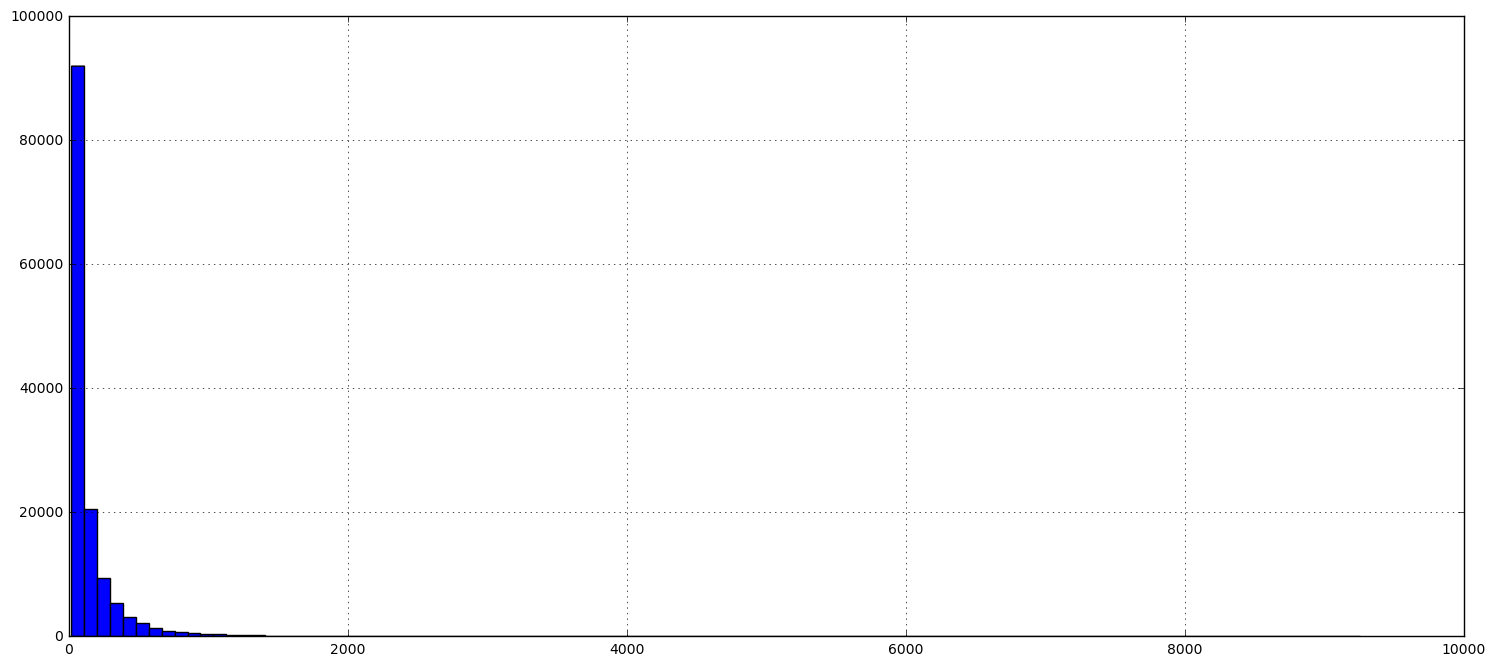

In [53]:
count_review_by_user = ratings.groupby('userId')['rating'].count()
count_review_by_user.hist(bins=100) ##movies reviewed by users, the majority have rated only few movies

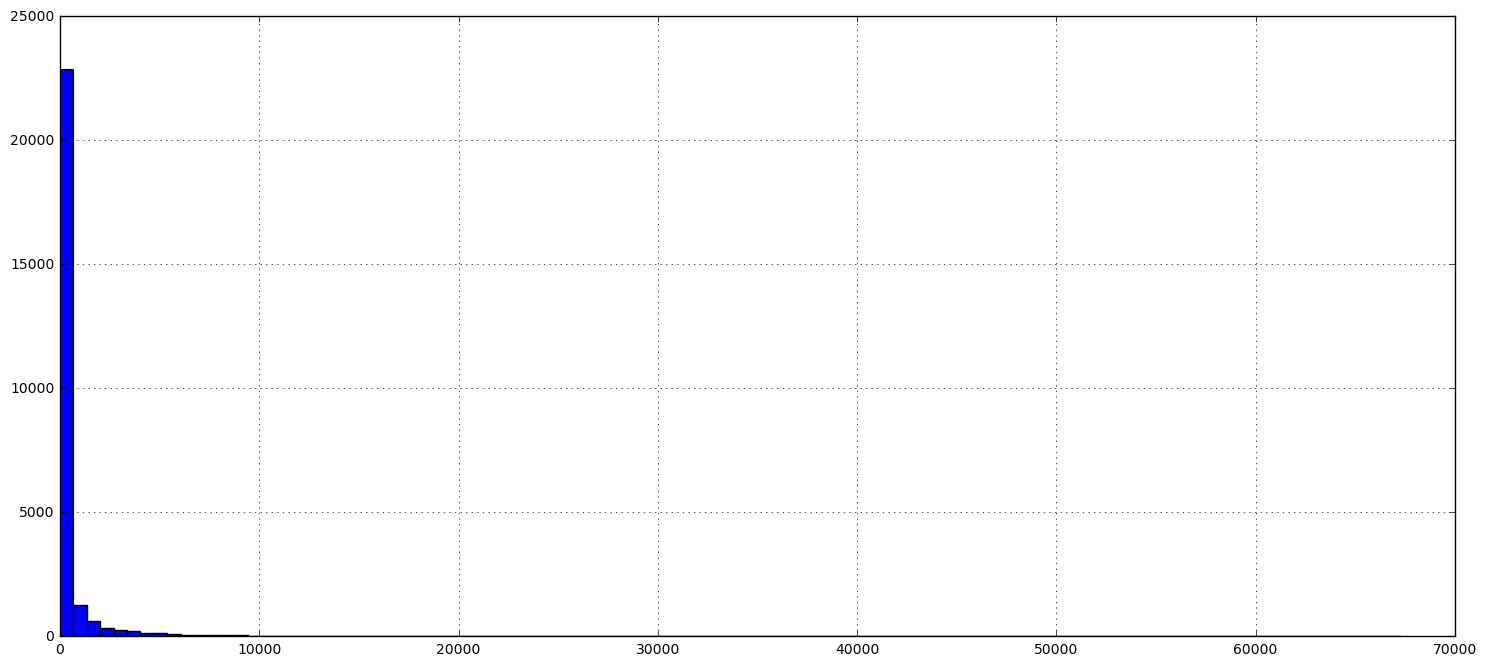

In [55]:
count_review_by_movie = ratings.groupby('movieId')['rating'].count()
count_review_by_movie.hist(bins=100) ##by movies

In [56]:
count_review_by_movie.describe()

count    26744.000000
mean       747.841123
std       3085.818268
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: rating, dtype: float64

In [57]:
count_review_by_user.describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: rating, dtype: float64

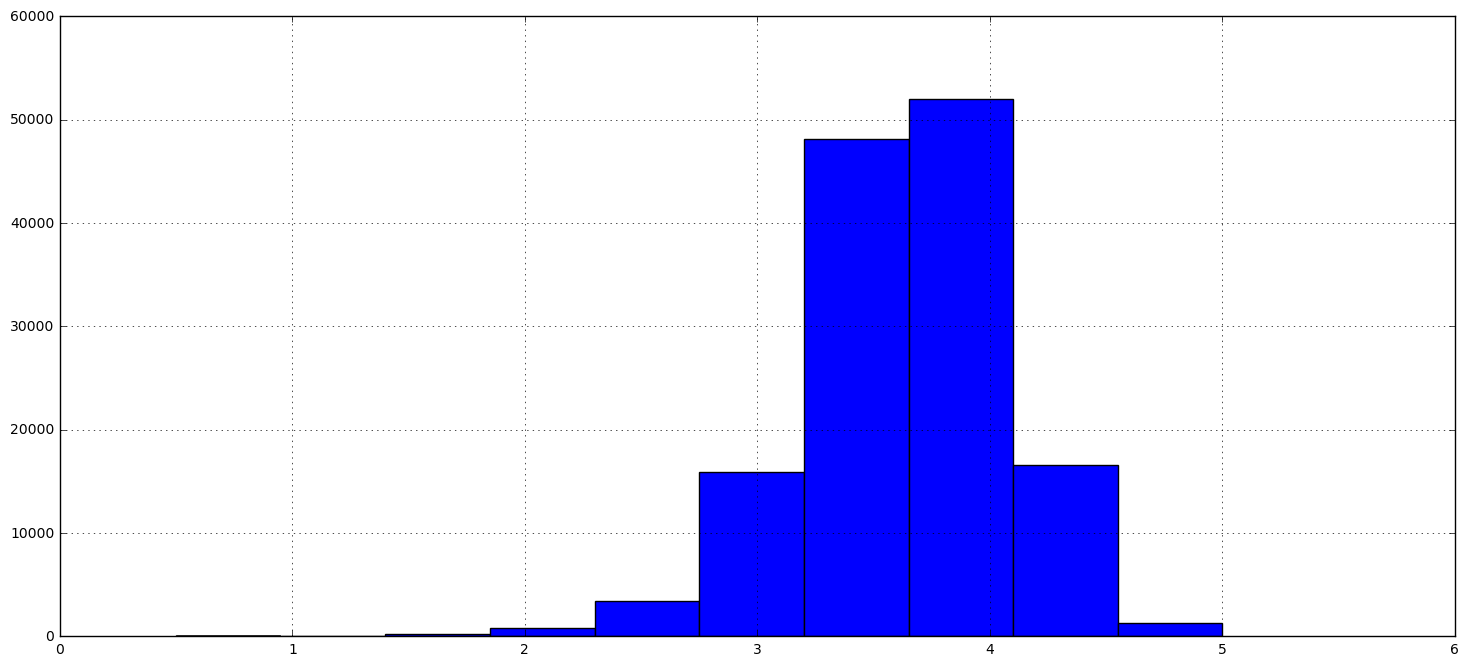

In [58]:
average_rating_by_user = ratings.groupby('userId')['rating'].mean()
average_rating_by_user.hist()

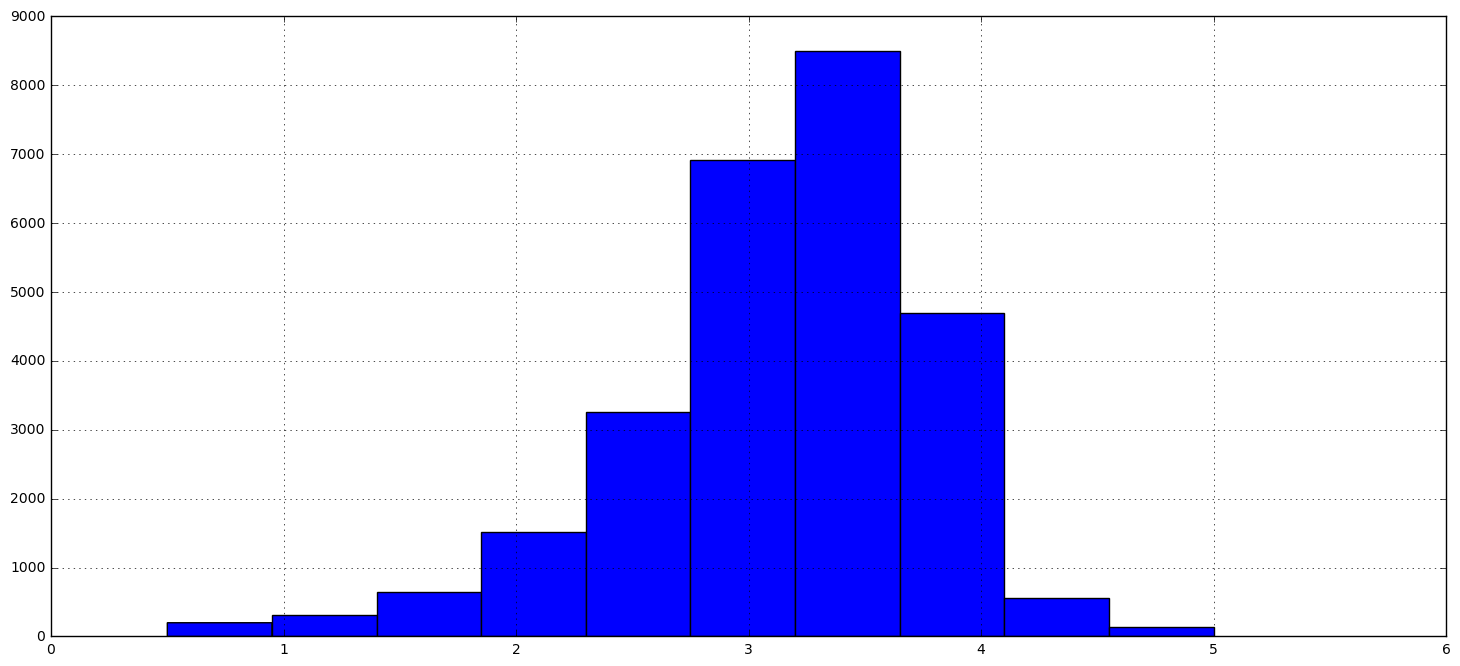

In [59]:
average_rating_by_movie = ratings.groupby('movieId')['rating'].mean()
average_rating_by_movie.hist()

In [60]:
##Average rating by user
print average_rating_by_user.mean()
##Average rating by movie
print average_rating_by_movie.mean()

3.62720862189
3.13319999013


In [61]:
count_review_by_user = count_review_by_user.reset_index()
count_review_by_movie = count_review_by_movie.reset_index()
average_rating_by_user = average_rating_by_user.reset_index()
average_rating_by_movie = average_rating_by_movie.reset_index()

In [62]:
count_review_by_user.columns = ['userId','count_rating_user']
count_review_by_movie.columns = ['movieId','count_rating_movie']
average_rating_by_user.columns = ['userId','average_rating_user']
average_rating_by_movie.columns = ['movieId','average_rating_movie']

In [66]:
df_rating = pd.merge(ratings, count_review_by_user, how='left', on='userId')
df_rating = pd.merge(df_rating, count_review_by_movie, how='left', on='movieId')
df_rating = pd.merge(df_rating, average_rating_by_user, how='left', on='userId')
df_rating = pd.merge(df_rating, average_rating_by_movie, how='left', on='movieId')

In [67]:
df_rating.head()

,userId,movieId,rating,timestamp,count_rating_user,count_rating_movie,average_rating_user,average_rating_movie
0,1,2,3.5,1112486027,175,22243,3.742857,3.211977
1,1,29,3.5,1112484676,175,8520,3.742857,3.952230
2,1,32,3.5,1112484819,175,44980,3.742857,3.898055
3,1,47,3.5,1112484727,175,43249,3.742857,4.053493
4,1,50,3.5,1112484580,175,47006,3.742857,4.334372


In [68]:
df_rating.count_rating_user.describe()

count    2.000026e+07
mean     5.115718e+02
std      6.633559e+02
min      2.000000e+01
25%      1.230000e+02
50%      2.960000e+02
75%      6.440000e+02
max      9.254000e+03
Name: count_rating_user, dtype: float64

In [69]:
df_rating.count_rating_movie.describe()

count    2.000026e+07
mean     1.348038e+04
std      1.411208e+04
min      1.000000e+00
25%      2.963000e+03
50%      8.505000e+03
75%      1.967400e+04
max      6.731000e+04
Name: count_rating_movie, dtype: float64

In [70]:
rating_subset = df_rating[(df_rating.count_rating_user >= 1500) & (df_rating.count_rating_movie >= 5000)]

In [72]:
rating_subset.shape, ratings.shape

((389724, 8), (20000263, 4))

In [73]:
len(rating_subset.userId.unique()), len(rating_subset.movieId.unique())

(581, 1005)

In [76]:
train_data, test_data = cv.train_test_split(rating_subset, test_size=0.25)

In [77]:
len(train_data.userId.unique()), len(test_data.userId.unique()), len(train_data.movieId.unique()), len(test_data.movieId.unique())

(581, 581, 1005, 1005)

In [78]:
train_data.head()

,userId,movieId,rating,timestamp,count_rating_user,count_rating_movie,average_rating_user,average_rating_movie
5996001,41283,780,4.0,1126101401,2030,47048,4.059606,3.370962
1988724,13494,2023,3.5,1346552671,1673,10141,3.688882,3.412484
9578543,66263,7254,3.5,1094155223,2265,8764,3.576159,3.691522
16439297,113806,3793,5.0,1114205028,2090,26846,3.972727,3.599009
1520540,10303,785,3.0,940933103,2374,10746,3.517692,3.285222


In [79]:
ptrain = train_data.pivot(index='userId', columns='movieId', values='rating')

In [80]:
ptrain.head()

movieId,1,2,3,5,6,7,10,11,14,16,...,70286,71535,72998,73017,74458,78499,79132,80463,81591,81845
userId,,,,,,,,,,,,,,,,,,,,,
156,NaN,NaN,2.0,3.0,NaN,4.0,NaN,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,NaN,NaN,3.0,NaN,3.5,4.5,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,NaN,3.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,3.0,...,3.0,4.0,3.0,NaN,3.0,NaN,4.0,NaN,4.0,NaN
775,4.5,NaN,3.5,1.0,3.5,3.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,NaN,4.0,2.0,3.0,4.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
train_user_index = pd.DataFrame(ptrain.index)
train_movies_index = pd.DataFrame(ptrain.columns)

In [82]:
ptest = test_data.pivot(index='userId', columns='movieId', values='rating')
ptest.head()

movieId,1,2,3,5,6,7,10,11,14,16,...,70286,71535,72998,73017,74458,78499,79132,80463,81591,81845
userId,,,,,,,,,,,,,,,,,,,,,
156,5.0,5.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,5.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,2.0,NaN,NaN,NaN,NaN,4.5,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,4.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
R = ptrain.fillna(0.0).copy().values
T = ptest.fillna(0.0).copy().values

In [86]:
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [87]:
def prediction(P,Q):
    return np.dot(P.T,Q)

In [88]:
lmbda = 0.1 
k = 20  
m, n = R.shape  
n_iter = 100  
step_size = 0.01

P = 3 * np.random.rand(k,m) 
Q = 3 * np.random.rand(k,n)

In [89]:
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - prediction(P,Q)))**2)/len(R[R > 0]))

In [90]:
R.nonzero()

(array([  0,   0,   0, ..., 580, 580, 580]),
 array([   2,    3,    5, ..., 1002, 1003, 1004]))

In [91]:
R.shape

(581, 1005)

In [92]:
Q.shape, P.shape

((20, 1005), (20, 581))

In [94]:
train_errors = []
test_errors = []
users, items = R.nonzero()      
for iter in xrange(n_iter):
    for u, i in zip(users, items):
        e = R[u, i] - prediction(P[:,u],Q[:,i])  
        P[:,u] += step_size * ( e * Q[:,i] - lmbda * P[:,u])
        Q[:,i] += step_size * ( e * P[:,u] - lmbda * Q[:,i])  
    train_rmse = rmse(I,R,Q,P) 
    test_rmse = rmse(I2,T,Q,P) 
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

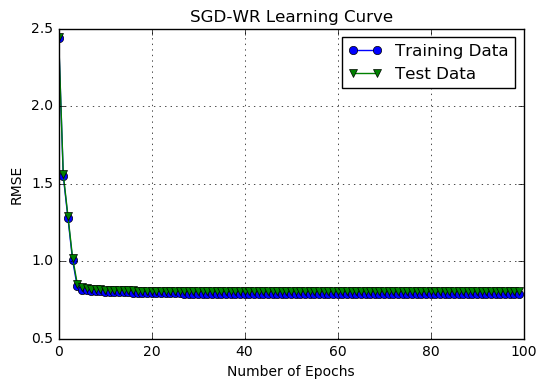

In [95]:
plt.plot(range(n_iter), train_errors, marker='o', label='Training Data');
plt.plot(range(n_iter), test_errors, marker='v', label='Test Data');
plt.title('SGD-WR Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [96]:
R = pd.DataFrame(R)
R_hat=pd.DataFrame(prediction(P,Q))

In [97]:
ratings = pd.DataFrame(data=R.loc[16,R.loc[16,:] > 0]).head(n=5)
ratings['Prediction'] = R_hat.loc[16,R.loc[16,:] > 0]
ratings.columns = ['Actual Rating', 'Predicted Rating']
ratings

,Actual Rating,Predicted Rating
0,4.0,3.652553
4,4.0,3.513065
5,2.0,2.353158
6,4.0,2.842753
7,3.5,2.833578


In [98]:
P.shape, Q.shape

((20, 581), (20, 1005))

In [99]:
R.loc[16,:].head()

0    4.0
1    0.0
2    0.0
3    0.0
4    4.0
Name: 16, dtype: float64

In [100]:
R_hat.loc[16,:].head()

0    3.652553
1    2.430034
2    2.442073
3    2.101811
4    3.513065
Name: 16, dtype: float64

In [101]:
T = pd.DataFrame(T)
T_hat=pd.DataFrame(prediction(P,Q))

In [102]:
T.loc[16,:].head()

0    0.0
1    2.5
2    0.0
3    0.0
4    0.0
Name: 16, dtype: float64

In [103]:
T_hat.loc[16,:].head()

0    3.652553
1    2.430034
2    2.442073
3    2.101811
4    3.513065
Name: 16, dtype: float64

In [104]:
train_user_index.loc[16,:].values[0]

3907

In [112]:
train_data[train_data.userId==train_user_index.loc[16,:].values[0]].count()

userId                  544
movieId                 544
rating                  544
timestamp               544
count_rating_user       544
count_rating_movie      544
average_rating_user     544
average_rating_movie    544
dtype: int64

In [106]:
predicted_ratings = pd.DataFrame(data=R_hat.loc[16,R.loc[16,:] == 0])

In [107]:
predicted_ratings.shape

(461, 1)

In [108]:
top_10_reco = predicted_ratings.sort_values(by=16,ascending=False).head(10)

In [109]:
top_10_reco

,16
242,4.043058
313,4.009645
240,3.988519
514,3.981706
254,3.967949
189,3.959534
39,3.868886
243,3.867349
986,3.866716
445,3.859640


In [110]:
top_10_reco.index.tolist()

[242, 313, 240, 514, 254, 189, 39, 243, 986, 445]

In [111]:
movies[movies.movieId.isin(top_10_reco.index.tolist())]

,movieId,title,genres,title_format,title_name,year,released_year
38,39,Clueless (1995),Comedy|Romance,<_sre.SRE_Match object at 0x7f8809197308>,Clueless,(1995),1995
187,189,Reckless (1995),Comedy|Fantasy,<_sre.SRE_Match object at 0x7f88091b8e68>,Reckless,(1995),1995
237,240,Hideaway (1995),Thriller,<_sre.SRE_Match object at 0x7f88091b7988>,Hideaway,(1995),1995
239,242,Farinelli: il castrato (1994),Drama|Musical,<_sre.SRE_Match object at 0x7f88091b78b8>,Farinelli: il castrato,(1994),1994
240,243,Gordy (1995),Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x7f88091b7850>,Gordy,(1995),1995
251,254,Jefferson in Paris (1995),Drama,<_sre.SRE_Match object at 0x7f88091b73d8>,Jefferson in Paris,(1995),1995
310,313,"Swan Princess, The (1994)",Animation|Children,<_sre.SRE_Match object at 0x7f88091b5ac0>,"Swan Princess, The",(1994),1994
441,445,Fatal Instinct (1993),Comedy,<_sre.SRE_Match object at 0x7f88091b23d8>,Fatal Instinct,(1993),1993
510,514,"Ref, The (1994)",Comedy,<_sre.SRE_Match object at 0x7f88091b06b0>,"Ref, The",(1994),1994
968,986,Fly Away Home (1996),Adventure|Children,<_sre.SRE_Match object at 0x7f88091a45e0>,Fly Away Home,(1996),1996


In [113]:
train_user_index.iloc[16,:]

userId    3907
Name: 16, dtype: int64

In [123]:
pd.merge(ratings[ratings.userId==3907].sort_values(by='rating',ascending=False).head(10), movies, on='movieId', how='left')

AttributeError: 'DataFrame' object has no attribute 'userId'